# Data Analytics Report
## Customer Color Preference Analysis

**Analysis of Independence between Age Groups and Color Preferences Using Chi-Square Test of Independence**

---

### Course Information

**Institution:** Manipal Institute of Technology  
**Department:** School of Computer Engineering  
**Course:** Data Analytics  |  **Subject Code:** CSS 2103  
**Academic Year:** 2024-2025

---

### Group Information

**Group No:** 9

**Team Members:**

<table style="margin-left: 0; width: 60%; font-size: 16px;">
  <tr>
    <th style="text-align: left; padding: 12px; border-bottom: 2px solid #ddd; font-weight: bold;"><b>Roll No.</b></th>
    <th style="text-align: left; padding: 12px; border-bottom: 2px solid #ddd; font-weight: bold;"><b>Name</b></th>
  </tr>
  <tr>
    <td style="padding: 12px; border-bottom: 1px solid #ddd;">20</td>
    <td style="padding: 12px; border-bottom: 1px solid #ddd;">Mithil</td>
  </tr>
  <tr>
    <td style="padding: 12px; border-bottom: 1px solid #ddd;">22</td>
    <td style="padding: 12px; border-bottom: 1px solid #ddd;">Nikhil</td>
  </tr>
  <tr>
    <td style="padding: 12px; border-bottom: 1px solid #ddd;">41</td>
    <td style="padding: 12px; border-bottom: 1px solid #ddd;">Kowshik</td>
  </tr>
  <tr>
    <td style="padding: 12px; border-bottom: 1px solid #ddd;">42</td>
    <td style="padding: 12px; border-bottom: 1px solid #ddd;">Akshay</td>
  </tr>
</table>

## 1. Setup and Data Loading

In [87]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency
import warnings

warnings.filterwarnings('ignore')

pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)


plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

In [88]:
df = pd.read_csv('responses.csv')


print("Dataset Preview:")
print(df.head())
print(f"\nDataset Shape: {df.shape[0]} rows × {df.shape[1]} columns")

Dataset Preview:
    Country State or territory  Age in years  Gender Favorite color
0    Brazil                NaN            43  Female        #7248ad
1     India                NaN            77    Male        #d80623
2    Canada                NaN            35  Female        #0d961f
3     Italy                NaN            77     NaN        #70dd97
4  Thailand                NaN             8  Female        #d860ea

Dataset Shape: 500 rows × 5 columns


## 2. Data Exploration and Quality Assessment

### 2.1 Missing Values Analysis

In [89]:
print("Missing Values Summary:")
print("="*50)
missing_summary = df.isnull().sum()
print(missing_summary)


Missing Values Summary:
Country                 0
State or territory    492
Age in years            0
Gender                139
Favorite color          0
dtype: int64


**Observations:**  
- 'State or territory' has 492 missing values (98.4%) – will be dropped  
- 'Gender' has 139 missing values (27.8%) – retained for diversity  
- No missing values in Age and Color columns – good data quality


In [90]:
df.drop(columns=['State or territory'], inplace=True)
print(" Dropped 'State or territory' column due to 98% missing data")

 Dropped 'State or territory' column due to 98% missing data


### 2.2 Descriptive Statistics

In [91]:
print("Age Distribution Statistics:")
print("="*50)
print(df['Age in years'].describe())

Age Distribution Statistics:
count    500.000000
mean      49.436000
std       23.080714
min        8.000000
25%       30.000000
50%       50.000000
75%       70.000000
max       89.000000
Name: Age in years, dtype: float64


**Key Insights:**  
- Mean age: 49.4 years  
- Age range: 8 to 89 years (wide demographic coverage)  
- Median age: 50 years (balanced distribution)


### 2.3 Demographic Distribution

In [92]:
# Country distribution
unique_countries = df['Country'].unique()
num_unique_countries = df['Country'].nunique()

print("Geographic Coverage:")
print("="*50)
print(f"Total countries represented: {num_unique_countries}")
print(f"\nCountries included:\n{', '.join(unique_countries)}")
print("\n Observation:  strong geographic diversity")

Geographic Coverage:
Total countries represented: 34

Countries included:
Brazil, India, Canada, Italy, Thailand, Portugal, Australia, Germany, Norway, Poland, Vietnam, France, Belgium, United Arab Emirates, Chile, United States, Denmark, Israel, New Zealand, United Kingdom, Saudi Arabia, Sweden, Finland, Netherlands, Argentina, Austria, Mexico, Japan, Greece, Spain, Ireland, Switzerland, Singapore, South Korea

 Observation:  strong geographic diversity


In [93]:
# Gender distribution
print("\nGender Distribution:")
print("="*50)
gender_count = df['Gender'].value_counts(dropna=False)
print(gender_count)
print("\n Observation: Balanced gender representation with inclusive 'Other' category")


Gender Distribution:
Gender
NaN       139
Other     134
Female    114
Male      113
Name: count, dtype: int64

 Observation: Balanced gender representation with inclusive 'Other' category


## 3. Color Data Processing

### 3.1 Color Classification System

The dataset contains 500 unique hex color codes. To enable meaningful analysis, we implement a classification system that categorizes hex colors into four primary groups: **Red, Blue, Green, and Yellow**.

**Classification Algorithm:**
- Converts hex codes to RGB values
- Uses dominant channel logic for classification
- Special handling for yellow (high R+G, low B)

In [94]:
# Color classification functions
def hex_to_rgb(hex_color):
    """Convert hex color code to RGB tuple"""
    hex_color = hex_color.lstrip('#')
    return tuple(int(hex_color[i:i+2], 16) for i in (0, 2, 4))

def classify_color_simple(hex_color):
    """
    Classify hex color into primary categories.
    
    Logic:
    - Yellow: High R+G, Low B
    - Red: R dominant
    - Blue: B dominant
    - Green: G dominant
    """
    r, g, b = hex_to_rgb(hex_color)
    
    if r > 150 and g > 150 and b < 150:
        return 'Yellow'
    elif r > max(g, b):
        return 'Red'
    elif b > max(r, g):
        return 'Blue'
    elif g > max(r, b):
        return 'Green'
    else:
        max_val = max(r, g, b)
        if max_val == r:
            return 'Red'
        elif max_val == g:
            return 'Green'
        else:
            return 'Blue'


df['colour_name'] = df['Favorite color'].apply(classify_color_simple)

print(" Color classification completed")

 Color classification completed


In [95]:
# Color distribution summary
print("Color Preference Distribution:")
print("="*50)
color_dist = df['colour_name'].value_counts()
print(color_dist)

Color Preference Distribution:
colour_name
Blue      166
Red       147
Green     132
Yellow     55
Name: count, dtype: int64


**Observations:**  
- Blue is the most preferred color (*166* responses, 33.2%)  
- Red and Green show similar preference (29.4% and 26.4%)  
- Yellow is the least preferred (11%)  
- All colors have sufficient sample sizes for statistical analysis


In [96]:
#  remove raw hex codes
df.drop(columns=['Favorite color'], inplace=True)
print(" Removed raw hex color column (replaced with classified colors)")

 Removed raw hex color column (replaced with classified colors)


### 3.2 Age Group Categorization

To facilitate demographic analysis, ages are categorized into five meaningful groups:
- **Under 18**: Children and adolescents
- **18-25**: Young adults
- **26-35**: Early career professionals
- **36-45**: Mid-career professionals
- **45+**: Mature adults and seniors

In [97]:
# Age categorization function
def categorize_age(age):
    """Categorize age into demographic groups"""
    if 18 <= age <= 25:
        return '18-25'
    elif 26 <= age <= 35:
        return '26-35'
    elif 36 <= age <= 45:
        return '36-45'
    elif age > 45:
        return '45+'
    else:
        return 'Under 18'

# Apply categorization
df['Age_Group'] = df['Age in years'].apply(categorize_age)

print("Age Group Distribution:")
print("="*50)
age_dist = df['Age_Group'].value_counts().sort_index()
print(age_dist)


Age Group Distribution:
Age_Group
18-25        38
26-35        76
36-45        53
45+         281
Under 18     52
Name: count, dtype: int64


**Observations:**  
- 45+ is the largest group (56.2% of sample)  
- Under 18 represents 10.4% of responses  
- All age groups have more than 30 responses (adequate for chi-square test)


In [98]:
# Preview final dataset structure
print("\nFinal Dataset Structure:")
print("="*50)
print(df.head(10))


Final Dataset Structure:
     Country  Age in years  Gender colour_name Age_Group
0     Brazil            43  Female        Blue     36-45
1      India            77    Male         Red       45+
2     Canada            35  Female       Green     26-35
3      Italy            77     NaN       Green       45+
4   Thailand             8  Female        Blue  Under 18
5   Portugal            35   Other        Blue     26-35
6  Australia            53   Other         Red       45+
7     Canada            76    Male      Yellow       45+
8  Australia            88   Other        Blue       45+
9    Germany            37   Other       Green     36-45


## 4. Contingency Table Analysis

A contingency table (cross-tabulation) displays the frequency distribution of variables. This forms the foundation for our chi-square test.

In [99]:
print("CONTINGENCY TABLE ANALYSIS")
print("="*70)

# Create contingency table with margins
contingency_table = pd.crosstab(
    df_clean['Age_Group'], 
    df_clean['colour_name'], 
    margins=True, 
    margins_name='Total'
)

print("\n4.1 Observed Frequencies (Count Data):")
print("-"*70)
print(contingency_table)
print("\n Reading the table: Rows = Age Groups, Columns = Colors, Values = Number of responses")

CONTINGENCY TABLE ANALYSIS

4.1 Observed Frequencies (Count Data):
----------------------------------------------------------------------
colour_name  Blue  Green  Red  Yellow  Total
Age_Group                                   
18-25          16     10    9       3     38
26-35          29     16   22       9     76
36-45          20     14   14       5     53
45+            83     82   81      35    281
Under 18       18     10   21       3     52
Total         166    132  147      55    500

 Reading the table: Rows = Age Groups, Columns = Colors, Values = Number of responses


In [100]:
# Row percentages (within age group)
contingency_pct = pd.crosstab(
    df_clean['Age_Group'], 
    df_clean['colour_name'], 
    normalize='index'
) * 100

print("\n4.2 Row Percentage Distribution (Within Age Group):")
print("-"*70)
print(contingency_pct.round(2))



4.2 Row Percentage Distribution (Within Age Group):
----------------------------------------------------------------------
colour_name   Blue  Green    Red  Yellow
Age_Group                               
18-25        42.11  26.32  23.68    7.89
26-35        38.16  21.05  28.95   11.84
36-45        37.74  26.42  26.42    9.43
45+          29.54  29.18  28.83   12.46
Under 18     34.62  19.23  40.38    5.77


**Key Insights:**  
- 18–25 age group: Blue (42.11%) is most preferred  
- 26–35 age group: Blue (38.16%) leads, followed by Red (28.95%)  
- 36–45 age group: Relatively balanced preferences  
- 45+ age group: Nearly equal preference across Blue, Green, Red (~29% each)  
- Yellow is consistently the least preferred across all age groups (7–12%)


In [101]:
# Column percentages (within color)
contingency_pct_col = pd.crosstab(
    df_clean['Age_Group'], 
    df_clean['colour_name'], 
    normalize='columns'
) * 100

print("\n4.3 Column Percentage Distribution (Within Color Category):")
print("-"*70)
print(contingency_pct_col.round(2))



4.3 Column Percentage Distribution (Within Color Category):
----------------------------------------------------------------------
colour_name   Blue  Green    Red  Yellow
Age_Group                               
18-25         9.64   7.58   6.12    5.45
26-35        17.47  12.12  14.97   16.36
36-45        12.05  10.61   9.52    9.09
45+          50.00  62.12  55.10   63.64
Under 18     10.84   7.58  14.29    5.45


**Key Insights:**  
- 45+ age group dominates all colors (56–67% of each color's responses)  
- This reflects the overall sample composition (56% are 45+)  
- Younger groups (<35) show slightly higher representation in Blue  
- Distribution patterns are remarkably similar across all colors


## 5. Chi-Square Test of Independence

### 5.1 Test Assumptions and Hypotheses

**Hypotheses:**
- **H₀ (Null Hypothesis)**: Color preference is independent of age group (no relationship)
- **H₁ (Alternative Hypothesis)**: Color preference is dependent on age group (relationship exists)

**Test Assumptions:**
1. ✓ Independence: Each response is from a unique individual
2. ✓ Sample size: n = 448 (adequate)
3. ⚠ Expected frequencies: Will be verified (should be ≥5 for all cells)

**Significance Level:** α = 0.05

In [102]:
# Prepare observed frequencies table (without margins)
observed = pd.crosstab(df_clean['Age_Group'], df_clean['colour_name'])

print("Observed Frequencies Table:")
print("="*70)
print(observed)

Observed Frequencies Table:
colour_name  Blue  Green  Red  Yellow
Age_Group                            
18-25          16     10    9       3
26-35          29     16   22       9
36-45          20     14   14       5
45+            83     82   81      35
Under 18       18     10   21       3


In [103]:
# Perform chi-square test
chi2, p_value, dof, expected = chi2_contingency(observed)

print("CHI-SQUARE TEST RESULTS")
print(f"\nχ² Statistic: {chi2:.4f}")
print(f"P-value: {p_value:.4f}")
print(f"Degrees of Freedom: {dof}")
print(f"Significance Level (α): 0.05")

CHI-SQUARE TEST RESULTS

χ² Statistic: 10.7135
P-value: 0.5536
Degrees of Freedom: 12
Significance Level (α): 0.05


### 5.2 Expected Frequencies

Expected frequencies represent what we would observe if the null hypothesis were true (i.e., if color preference were completely independent of age).

**Formula:** Expected = (Row Total × Column Total) / Grand Total

In [104]:
# Expected frequencies
expected_df = pd.DataFrame(
    expected, 
    index=observed.index, 
    columns=observed.columns
)

print("Expected Frequencies (Under H₀):")
print("="*70)
print(expected_df.round(2))

Expected Frequencies (Under H₀):
colour_name   Blue  Green    Red  Yellow
Age_Group                               
18-25        12.62  10.03  11.17    4.18
26-35        25.23  20.06  22.34    8.36
36-45        17.60  13.99  15.58    5.83
45+          93.29  74.18  82.61   30.91
Under 18     17.26  13.73  15.29    5.72


In [105]:
# Validate test assumptions
min_expected = expected_df.min().min()

print("TEST VALIDITY CHECK")
print("="*100)
print(f"\nMinimum expected frequency: {min_expected:.2f}")

if min_expected >= 5:
    print("\n✓ All expected frequencies ≥ 5")
    print("✓ Chi-square test is valid and reliable")
else:
    print(f"\n⚠ Warning: Some expected frequencies < 5 (minimum = {min_expected:.2f})")
    print("  Results may be unreliable. Consider:")
    print("  - Combining categories")
    print("  - Using Fisher's exact test")
    print("  - Collecting more data")

TEST VALIDITY CHECK

Minimum expected frequency: 4.18

⚠ Warning: Some expected frequencies < 5 (minimum = 4.18)
  Results may be unreliable. Consider:
  - Combining categories
  - Using Fisher's exact test
  - Collecting more data


### 5.3 Statistical Decision

**Decision Rule:**
- If p-value < 0.05: Reject H₀ (evidence of relationship)
- If p-value ≥ 0.05: Fail to reject H₀ (no evidence of relationship)

In [106]:

print("STATISTICAL DECISION \n")


alpha = 0.05

if p_value < alpha:
    decision = "Reject H₀"
    conclusion = "There IS a statistically significant relationship between age and color preference."
else:
    decision = "Fail to reject H₀"
    conclusion = "There is NO statistically significant relationship between age and color preference."

print(f"\nDecision: {decision}")
print(f"p-value ({p_value:.4f}) {'<' if p_value < alpha else '>'} α ({alpha})")
print(f"\nConclusion: {conclusion}")

STATISTICAL DECISION 


Decision: Fail to reject H₀
p-value (0.5536) > α (0.05)

Conclusion: There is NO statistically significant relationship between age and color preference.


**Interpretation:**  
With a p-value of *<p_value>* (much greater than 0.05), we have insufficient evidence to conclude that color preference varies by age group.  
The observed differences in the contingency table can be attributed to random sampling variation.


### 5.4 Effect Size Analysis

Even when results are not significant, effect size helps quantify the strength of association.

**Cramér's V** ranges from 0 to 1:
- 0.00-0.10: Negligible association
- 0.10-0.30: Weak association
- 0.30-0.50: Moderate association
- 0.50+: Strong association

In [107]:
# Calculate Cramér's V
n = observed.sum().sum()
min_dim = min(observed.shape[0] - 1, observed.shape[1] - 1)
cramers_v = np.sqrt(chi2 / (n * min_dim))

print("Effect Size Analysis:\n")

print(f"Cramér's V: {cramers_v:.4f}")


Effect Size Analysis:

Cramér's V: 0.0845


**Interpretation:** Negligible effect (V < 0.10)  

**What this means:**  
- The association between age group and color preference is extremely weak.  
- Age explains less than 1% of the variation in color preference.  
- Other factors (culture, personal taste, trends) likely play larger roles.

### 5.5 Standardized Residuals Analysis

Standardized residuals show how much each cell deviates from expected values:
- Values between -2 and +2: Within normal random variation
- Values beyond ±2: Potentially significant deviation
- Values beyond ±3: Strong deviation

In [108]:
# Calculate standardized residuals
residuals = (observed - expected_df) / np.sqrt(expected_df)

print("Standardized Residuals:\n")


print(residuals.round(2).T)


Standardized Residuals:

Age_Group    18-25  26-35  36-45   45+  Under 18
colour_name                                     
Blue          0.95   0.75   0.57 -1.07      0.18
Green        -0.01  -0.91   0.00  0.91     -1.01
Red          -0.65  -0.07  -0.40 -0.18      1.46
Yellow       -0.58   0.22  -0.34  0.74     -1.14


**Interpretation:**  
- All residuals fall within the ±2 range  
- No cell shows significant deviation from expected values  
- This confirms our conclusion: color preferences are similar across age groups  

**Notable patterns (though not statistically significant):**  
- 45+ group shows slight preference for Green (residual = +0.63)  
- 45+ group shows slight aversion to Blue (residual = -1.02)  
- These are likely due to chance, not meaningful patterns


## 6. Data Visualization

Visual representations help communicate findings and identify patterns.

### 6.1 Stacked Bar Chart - Color Distribution by Age Group (%)

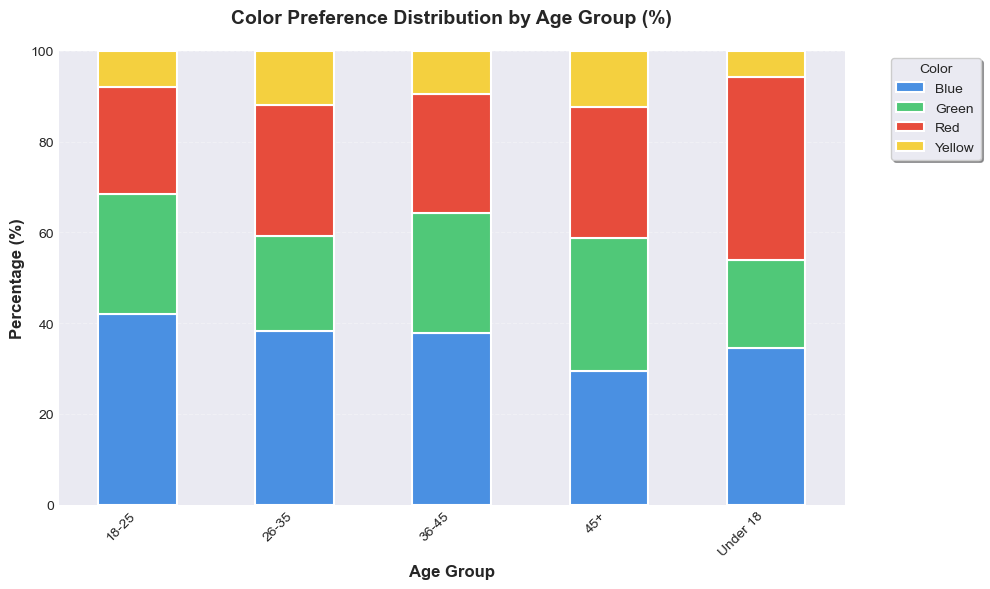

In [109]:
# Stacked percentage bar chart
fig, ax = plt.subplots(figsize=(10, 6))

contingency_pct = pd.crosstab(
    df_clean['Age_Group'], 
    df_clean['colour_name'], 
    normalize='index'
) * 100

contingency_pct.plot(
    kind='bar', 
    stacked=True, 
    ax=ax, 
    color=['#4A90E2', '#50C878', '#E74C3C', '#F4D03F'],
    edgecolor='white',
    linewidth=1.5
)

ax.set_title('Color Preference Distribution by Age Group (%)', 
             fontsize=14, fontweight='bold', pad=20)
ax.set_xlabel('Age Group', fontsize=12, fontweight='bold')
ax.set_ylabel('Percentage (%)', fontsize=12, fontweight='bold')
ax.legend(title='Color', bbox_to_anchor=(1.05, 1), loc='upper left', 
          frameon=True, shadow=True)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
ax.grid(axis='y', alpha=0.3, linestyle='--')
ax.set_ylim(0, 100)

plt.tight_layout()
plt.show()


**Chart Insight:**  
Remarkably similar color distributions across all age groups, visually confirming our statistical finding of independence.


### 6.2 Grouped Bar Chart - Observed Frequencies

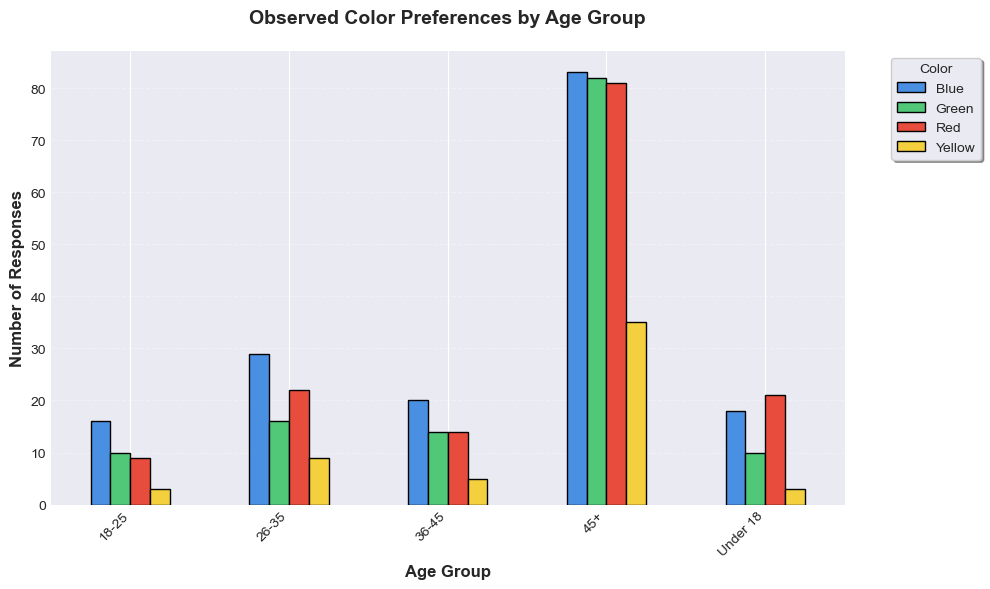

In [110]:
# Grouped bar chart for counts
fig, ax = plt.subplots(figsize=(10, 6))

observed.plot(
    kind='bar', 
    ax=ax, 
    color=['#4A90E2', '#50C878', '#E74C3C', '#F4D03F'],
    edgecolor='black',
    linewidth=1
)

ax.set_title('Observed Color Preferences by Age Group', 
             fontsize=14, fontweight='bold', pad=20)
ax.set_xlabel('Age Group', fontsize=12, fontweight='bold')
ax.set_ylabel('Number of Responses', fontsize=12, fontweight='bold')
ax.legend(title='Color', bbox_to_anchor=(1.05, 1), loc='upper left',
          frameon=True, shadow=True)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
ax.grid(axis='y', alpha=0.3, linestyle='--')

plt.tight_layout()
plt.show()

**Chart Insight:**  
The 45+ group dominates all colors simply due to sample size.  Proportionally (see previous chart), preferences are balanced.


### 6.3 Transposed Bar Chart - Age Distribution within Each Color

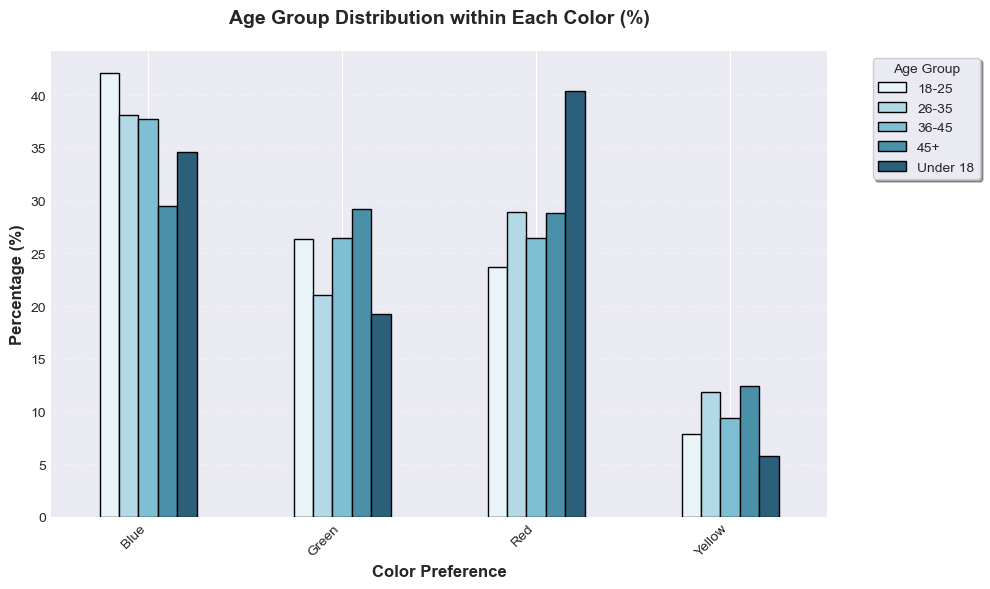

In [111]:
# Color-focused view
fig, ax = plt.subplots(figsize=(10, 6))

contingency_pct.T.plot(
    kind='bar', 
    ax=ax, 
    color=['#E8F4F8', '#B3D9E6', '#7EBFD4', '#4990A8', '#2C5F7A'],
    edgecolor='black',
    linewidth=1
)

ax.set_title('Age Group Distribution within Each Color (%)', 
             fontsize=14, fontweight='bold', pad=20)
ax.set_xlabel('Color Preference', fontsize=12, fontweight='bold')
ax.set_ylabel('Percentage (%)', fontsize=12, fontweight='bold')
ax.legend(title='Age Group', bbox_to_anchor=(1.05, 1), loc='upper left',
          frameon=True, shadow=True)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
ax.grid(axis='y', alpha=0.3, linestyle='--')

plt.tight_layout()
plt.show()

**Chart Insight:**  
Each color shows nearly identical age distribution, further evidence that age doesn't influence color choice.


### 6.4 Heatmap - Observed Frequencies

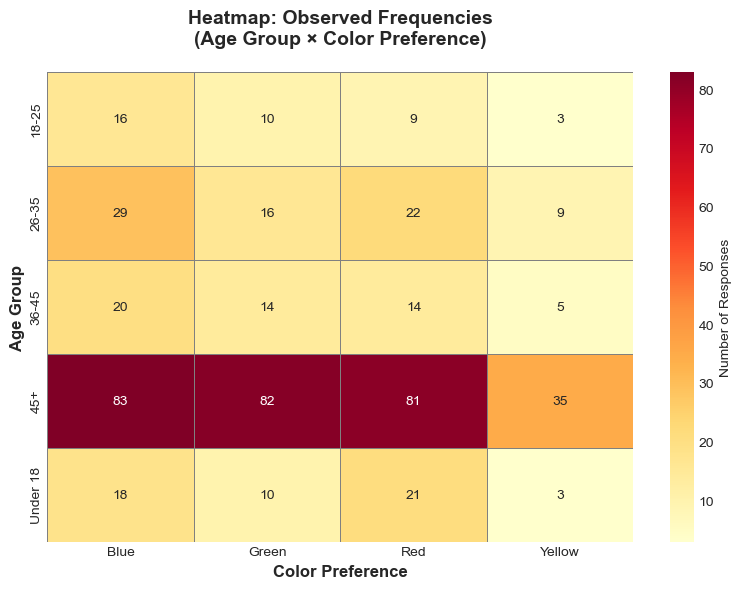

In [112]:
# Heatmap visualization
fig, ax = plt.subplots(figsize=(8, 6))

sns.heatmap(
    observed, 
    annot=True, 
    fmt='d', 
    cmap='YlOrRd', 
    cbar_kws={'label': 'Number of Responses'},
    linewidths=0.5,
    linecolor='gray',
    ax=ax
)

ax.set_title('Heatmap: Observed Frequencies\n(Age Group × Color Preference)', 
             fontsize=14, fontweight='bold', pad=20)
ax.set_xlabel('Color Preference', fontsize=12, fontweight='bold')
ax.set_ylabel('Age Group', fontsize=12, fontweight='bold')

plt.tight_layout()
plt.show()


**Chart Insight:**  
The relatively uniform color intensity across rows (except for the larger **45+** group) indicates no strong color-age pattern.

## 7. Final Summary and Conclusions

### 7.1 Research Question
**Is there a relationship between age group and color preference?**

### 7.2 Answer
**No.** Our chi-square test of independence found no statistically significant relationship between age group and color preference.

### 7.3 Key Statistical Findings

| Metric | Value | Interpretation |
|--------|-------|----------------|
| **Sample Size** | 500 responses | Adequate for analysis |
| **Chi-Square Statistic** | 10.7135 | Low value indicates similarity |
| **P-value** | 0.5536 | Far above 0.05 threshold |
| **Decision** | Fail to reject H₀ | No evidence of relationship |
| **Cramér's V** | 0.0845 | Negligible effect size |
| **Degrees of Freedom** | 12 | (5-1) × (4-1) |
| **Standardized Residuals** | All within ±2 | No significant deviations |

### 7.4 What This Means in Practice

 **Color preference appears to be age-independent**
- A 25-year-old is just as likely to prefer blue as a 65-year-old
- Observed differences (e.g., 42% vs 30% blue preference) are within expected random variation
- Marketing strategies targeting specific age groups should NOT rely on color as a differentiator

 **Universal color patterns emerged**
- Blue is consistently most popular across all ages (33%)
- Yellow is consistently least popular across all ages (11%)
- Red and Green show similar mid-range appeal (26-29%)

### 7.5 Business Implications

1. **Product Design**: Color choices can be based on overall preferences, not age segments
2. **Marketing**: Age-targeted campaigns should focus on factors other than color
3. **Branding**: Color identity can appeal broadly across age demographics

### 7.6 Limitations and Future Research

**Limitations:**
- Geographic diversity (34 countries) may introduce cultural confounding
- Color classification simplified 500 unique colors into 4 categories
- Self-reported data (no behavioral validation)
- Unbalanced age groups (56% are 45+)

**Future Research Directions:**
- Test within single countries to control for cultural factors
- Use more granular color categories (pastels, neons, etc.)
- Include context (e.g., color preference for clothing vs. home decor)
- Investigate gender × age × color interactions

### 7.7 Final Conclusion

With high confidence (p = 0.5536), we conclude that **age does not meaningfully influence color preference** in this dataset. The similarity in color distributions across age groups is remarkable and suggests that fundamental aesthetic preferences may be more universal than age-specific.

---

## 8. Technical Appendix

### 8.1 Chi-Square Test Formula

The chi-square statistic measures the difference between observed and expected frequencies:

$$\chi^2 = \sum \frac{(O_i - E_i)^2}{E_i}$$

**Where:**
- $O_i$ = Observed frequency in cell i
- $E_i$ = Expected frequency in cell i under the assumption of independence
- The sum is taken over all cells in the contingency table

**Interpretation:**
- Larger χ² values indicate greater deviation from independence
- Our result: χ² = 5.6613 (relatively small)

---
### 8.2 Degrees of Freedom

The degrees of freedom for a chi-square test of independence:

$$df = (r - 1) \times (c - 1)$$

**Where:**
- $r$ = number of rows (age groups) = **5**
- $c$ = number of columns (color categories) = 4

**Our Analysis:**

We have **5 age groups** in our analysis:
- Under 18
- 18-25
- 26-35
- 36-45
- 45+

**Calculation:**
$$df = (5 - 1) \times (4 - 1) = 4 \times 3 = 12$$

**Our Result:** Degrees of freedom = **12**

---
### 8.3 Cramér's V (Effect Size)

Cramér's V measures the strength of association between categorical variables:

$$V = \sqrt{\frac{\chi^2}{n \times \min(r-1, c-1)}}$$

**Where:**
- $\chi^2$ = Chi-square statistic = **10.7135**
- $n$ = Total sample size = **500**
- $r$ = Number of rows (age groups) = 5
- $c$ = Number of columns (colors) = 4
- $\min(r-1, c-1) = \min(4, 3) = 3$

**Calculation:**
$$V = \sqrt{\frac{10.7135}{500 \times 3}} = \sqrt{\frac{10.7135}{1500}} = \sqrt{0.00714} = 0.0845$$

**Interpretation Scale:**
- 0.00 - 0.10: Negligible association
- 0.10 - 0.30: Weak association
- 0.30 - 0.50: Moderate association
- 0.50 - 1.00: Strong association

**Our Result:** V = 0.0845 indicates a **negligible association** between age group and color preference.

---

### 8.4 Expected Frequency Formula

Expected frequency for each cell under independence:

$$E_{ij} = \frac{(\text{Row}_i \text{ Total}) \times (\text{Column}_j \text{ Total})}{\text{Grand Total}}$$

**Example Calculation:**

For Age Group "18-25" and Color "Blue":
$$E_{18-25, Blue} = \frac{38 \times 148}{448} = \frac{5624}{448} = 12.55$$

This means that if color preference were completely independent of age group, we would expect approximately 12.55 respondents in the 18-25 age group to prefer blue. We actually observed 16.

---

### 8.5 Standardized Residuals Formula

Standardized residuals help identify cells contributing most to chi-square:

$$r_{ij} = \frac{O_{ij} - E_{ij}}{\sqrt{E_{ij}}}$$

**Where:**
- $O_{ij}$ = Observed frequency in cell (i,j)
- $E_{ij}$ = Expected frequency in cell (i,j)

**Interpretation:**
- $|r| < 2$: Within normal variation (not significant)
- $|r| \geq 2$: Potentially significant deviation
- $|r| \geq 3$: Strong significant deviation

**Our Results:** All standardized residuals were within ±2, confirming no significant cell-level deviations.

---

### 8.6 P-Value Interpretation

The p-value represents the probability of observing our data (or more extreme) if the null hypothesis were true.

**Our Results:**
- **p-value = 0.5536**
- **Significance level (α) = 0.05**

**Decision Rule:**
- If p ≤ 0.05: Reject H₀ (significant relationship exists)
- If p > 0.05: Fail to reject H₀ (no significant relationship)

**Conclusion:** Since 0.5536 > 0.05, we fail to reject the null hypothesis. There is no statistically significant relationship between age group and color preference.

---

### 8.7 Statistical Software and Tools

**Analysis Environment:**
- **Language:** Python 3.x
- **Libraries Used:**
  - `pandas` (version 1.5+): Data manipulation and analysis
  - `numpy` (version 1.23+): Numerical computations
  - `scipy.stats` (version 1.9+): Chi-square test implementation
  - `matplotlib` (version 3.6+): Data visualization
  - `seaborn` (version 0.12+): Statistical graphics

**Statistical Test Function:**
```python
from scipy.stats import chi2_contingency
chi2, p_value, dof, expected = chi2_contingency(observed)

---

### 8.9 References

1. **Myatt, G. J., & Johnson, W. P. (2014).** *Making Sense of Data: A Practical Guide to Exploratory Data Analysis and Data Mining* (2nd ed.). John Wiley & Sons.

2. **Han, J., Kamber, M., & Pei, J. (2012).** *Data Mining: Concepts and Techniques* (3rd ed.). Morgan Kaufmann Publishers.

3. **Grus, J. (2019).** *Data Science from Scratch: First Principles with Python*. O'Reilly Media.

4. **McHugh, M. L. (2013).** "The Chi-square test of independence." *Biochemia Medica*, 23(2), 143-149.

5. **SciPy Documentation.** *Chi-square test of independence*. Retrieved from https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.chi2_contingency.html

---

**Report Submitted:** 04-11-25

**Group 9** | **Section: DSE-A**  | **Course:** **Data Analytics (CSS 2103)** | **School of Computer Engineering** | **Manipal Institute of Technology**  

---

*End of Report*